In [3]:
import pandas as pd

df = pd.read_csv("covid_19_country_wise_latest (1).csv")

print(df.head(5))

   Unnamed: 0 Country/Region  Confirmed Deaths  Recovered  Active  New cases  \
0           0    Afghanistan      36263   1269      25198    9796      106.0   
1           1        Albania       4880    144       2745    1991      117.0   
2           2        Algeria      27973   1163      18837    7973      616.0   
3           3        Andorra        907     52        803      52       10.0   
4           4         Angola        950     41        242     667       18.0   

   New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0        10.0             18                3.50                  69.49   
1         6.0             63                2.95                  56.25   
2         8.0            749                4.16                  67.34   
3         0.0              0                5.73                  88.53   
4         1.0              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0  

In [19]:
df.set_index('Country/Region', inplace=True, drop=True)

print(df.head())

                Confirmed Deaths  Recovered  Active  New cases  New deaths  \
Country/Region                                                               
Afghanistan         36263   1269      25198    9796      106.0        10.0   
Albania              4880    144       2745    1991      117.0         6.0   
Algeria             27973   1163      18837    7973      616.0         8.0   
Andorra               907     52        803      52       10.0         0.0   
Angola                950     41        242     667       18.0         1.0   

                New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
Country/Region                                                             
Afghanistan                18                3.50                  69.49   
Albania                    63                2.95                  56.25   
Algeria                   749                4.16                  67.34   
Andorra                     0                5.73                  88.53 

In [25]:
df.index.name = 'index'

print(df.head())

             Confirmed Deaths  Recovered  Active  New cases  New deaths  \
index                                                                     
Afghanistan      36263   1269      25198    9796      106.0        10.0   
Albania           4880    144       2745    1991      117.0         6.0   
Algeria          27973   1163      18837    7973      616.0         8.0   
Andorra            907     52        803      52       10.0         0.0   
Angola             950     41        242     667       18.0         1.0   

             New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
index                                                                   
Afghanistan             18                3.50                  69.49   
Albania                 63                2.95                  56.25   
Algeria                749                4.16                  67.34   
Andorra                  0                5.73                  88.53   
Angola                   0          

In [27]:
def replace_whitespace_with_underscore(df):
    df.columns = df.columns.str.replace(' ', '_')
    return df

df = replace_whitespace_with_underscore(df)

print(df.columns)

Index(['Confirmed', 'Deaths', 'Recovered', 'Active', 'New_cases', 'New_deaths',
       'New_recovered', 'Deaths_/_100_Cases', 'Recovered_/_100_Cases',
       'Deaths_/_100_Recovered', 'Confirmed_last_week', '1_week_change',
       '1_week_%_increase', 'WHO_Region'],
      dtype='object')


In [29]:
print(df.info())

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, Afghanistan to Zimbabwe
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Confirmed               187 non-null    int64  
 1   Deaths                  187 non-null    object 
 2   Recovered               187 non-null    int64  
 3   Active                  187 non-null    int64  
 4   New_cases               177 non-null    float64
 5   New_deaths              177 non-null    float64
 6   New_recovered           187 non-null    int64  
 7   Deaths_/_100_Cases      187 non-null    float64
 8   Recovered_/_100_Cases   187 non-null    float64
 9   Deaths_/_100_Recovered  187 non-null    float64
 10  Confirmed_last_week     187 non-null    int64  
 11  1_week_change           187 non-null    int64  
 12  1_week_%_increase       187 non-null    float64
 13  WHO_Region              187 non-null    object 
dtypes: float64(6), int64(6), object(

In [ ]:
df.fillna(df.mean(), inplace=True)

print(df.isnull().sum())

In [69]:
unique_countries = df['Confirmed'].nunique()

print(f"Number of unique countries: {unique_countries}")

Number of unique countries: 184


In [73]:
duplicates = df[df.duplicated(subset=['Confirmed'], keep=False)]

df.drop_duplicates(subset=['Confirmed'], keep='first', inplace=True)

print(df.head())

             Confirmed Deaths  Recovered  Active  New_cases  New_deaths  \
index                                                                     
Afghanistan      36263   1269      25198    9796      106.0        10.0   
Albania           4880    144       2745    1991      117.0         6.0   
Algeria          27973   1163      18837    7973      616.0         8.0   
Andorra            907     52        803      52       10.0         0.0   
Angola             950     41        242     667       18.0         1.0   

             New_recovered  Deaths_/_100_Cases  Recovered_/_100_Cases  \
index                                                                   
Afghanistan             18                3.50                  69.49   
Albania                 63                2.95                  56.25   
Algeria                749                4.16                  67.34   
Andorra                  0                5.73                  88.53   
Angola                   0          

In [75]:
mean_cases = df['Confirmed'].mean()
median_cases = df['Confirmed'].median()
std_cases = df['Confirmed'].std()

print(f"Mean of Total Cases: {mean_cases}")
print(f"Median of Total Cases: {median_cases}")
print(f"Standard Deviation of Total Cases: {std_cases}")


Mean of Total Cases: 89509.53260869565
Median of Total Cases: 5633.5
Standard Deviation of Total Cases: 386293.1770143578


In [77]:
df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')
df['Deaths'].fillna(df['Deaths'].mean(), inplace=True)

print(df['Deaths'].head())

index
Afghanistan    1269.0
Albania         144.0
Algeria        1163.0
Andorra          52.0
Angola           41.0
Name: Deaths, dtype: float64


In [79]:
df['Deaths'] = df['Deaths'].astype('float64')

print(df['Deaths'].dtype)

float64


In [81]:
total_deaths = df['Deaths'].sum()
total_recoveries = df['Recovered'].sum()

print(f"Total Deaths Worldwide: {total_deaths}")
print(f"Total Recoveries Worldwide: {total_recoveries}")

Total Deaths Worldwide: 657494.3387978142
Total Recoveries Worldwide: 9464254


In [83]:
countries_above_1m = df[df['Confirmed'] > 1_000_000]

print(f"Number of countries with more than 1 million total cases: {len(countries_above_1m)}")

Number of countries with more than 1 million total cases: 3


In [147]:
countries_above_95_recovery = df[df['Recovery_Rate'] > 95]

print(countries_above_95_recovery[['Recovery_Rate']].head())

    Recovery_Rate
24      97.872340
48      98.379126
49     100.000000
69     100.000000
75     100.000000


In [97]:
df.drop(columns=['WHO_Region' , 'Confirmed'], inplace=True)

print(df.head())

             Deaths  Recovered  Active  New_cases  New_deaths  New_recovered  \
index                                                                          
Afghanistan  1269.0      25198    9796      106.0        10.0             18   
Albania       144.0       2745    1991      117.0         6.0             63   
Algeria      1163.0      18837    7973      616.0         8.0            749   
Andorra        52.0        803      52       10.0         0.0              0   
Angola         41.0        242     667       18.0         1.0              0   

             Deaths_/_100_Cases  Recovered_/_100_Cases  \
index                                                    
Afghanistan                3.50                  69.49   
Albania                    2.95                  56.25   
Algeria                    4.16                  67.34   
Andorra                    5.73                  88.53   
Angola                     4.32                  25.47   

             Deaths_/_100_Recove

In [115]:
max_deaths_country = df.loc[df['Deaths'].idxmax()]

print(f"Country with the highest number of deaths: {max_deaths_country.name}")

Country with the highest number of deaths: US


In [125]:
df_sorted_by_deaths = df.sort_values(by='Deaths', ascending=False)

df_sorted_by_deaths.reset_index(inplace=True)

print(df_sorted_by_deaths[['index', 'Deaths']].head())

            index    Deaths
0              US  148011.0
1          Brazil   87618.0
2  United Kingdom   45844.0
3          Mexico   44022.0
4           Italy   35112.0


In [137]:
df['Total_Cases'] = df['Deaths'] + df['Recovered'] + df['Active']


print(df[['Total_Cases']].head())

             Total_Cases
index                   
Afghanistan      36263.0
Albania           4880.0
Algeria          27973.0
Andorra            907.0
Angola             950.0


In [139]:
df['Death_Rate'] = (df['Deaths'] / df['Total_Cases']) * 100

print(df[['Death_Rate']].head())

             Death_Rate
index                  
Afghanistan    3.499435
Albania        2.950820
Algeria        4.157581
Andorra        5.733186
Angola         4.315789


In [159]:
low_death_rate_increasing_cases = df[(df['1_week_change'] > 0) & (df['Death_Rate'] < 6)]

print(low_death_rate_increasing_cases[['Death_Rate', '1_week_change']].head())

   Death_Rate  1_week_change
0    3.499435            737
1    2.950820            709
2    4.157581           4282
3    5.733186             23
4    4.315789            201


In [163]:
print(df[['Death_Rate']].head())

   Death_Rate
0    3.499435
1    2.950820
2    4.157581
3    5.733186
4    4.315789


In [185]:
df.reset_index(drop=True, inplace=True)

df['Country/Region'] = df.index

print(df[['Country/Region', 'Death_Rate']].head())

   Country/Region  Death_Rate
0               0    3.499435
1               1    2.950820
2               2    4.157581
3               3    5.733186
4               4    4.315789


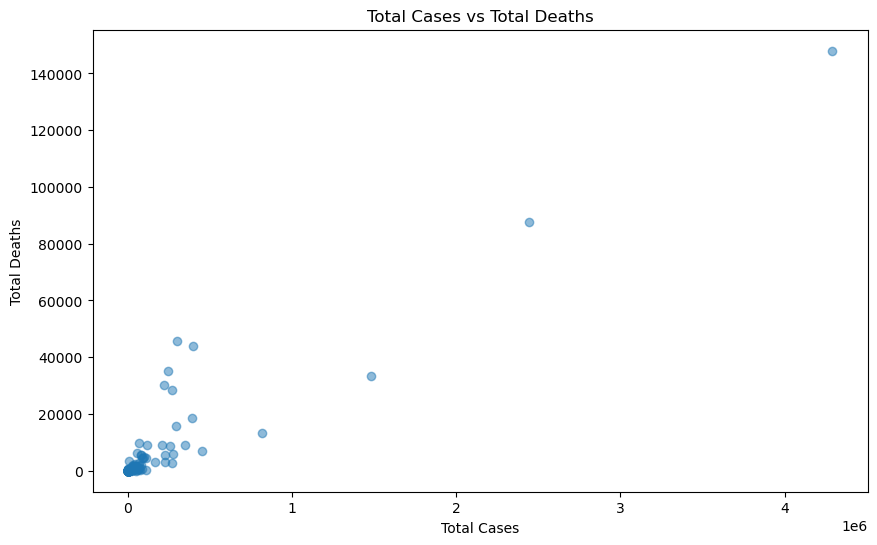

In [187]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Total_Cases'], df['Deaths'], alpha=0.5)
plt.title('Total Cases vs Total Deaths')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.show()

In [195]:
df.to_csv('covid_data.csv', index=True)

In [199]:
df.update

<bound method DataFrame.update of      Unnamed: 0  level_0           index       Deaths  Recovered  Active  \
0             0        0     Afghanistan  1269.000000      25198    9796   
1             1        1         Albania   144.000000       2745    1991   
2             2        2         Algeria  1163.000000      18837    7973   
3             3        3         Andorra    52.000000        803      52   
4             4        4          Angola    41.000000        242     667   
..          ...      ...             ...          ...        ...     ...   
179         179      179         Vietnam     0.000000        365      66   
180         180      180  Western Sahara     1.000000          8       1   
181         181      181           Yemen   483.000000        833     375   
182         182      182          Zambia   140.000000       2815    1597   
183         183      183        Zimbabwe  3573.338798        542    2126   

     New_cases  New_deaths  New_recovered  Deaths_/_1